In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [45]:
## Census Tract GeoID for Long Beach
LB_GEOID = '0643000'


In [46]:
# Grab California Metropolitan Service Area Dataframe from Census
## Update the URL to match the census survey you are interested in

ca_msa_url = r'https://www2.census.gov/geo/tiger/TIGER2020/PLACE/tl_2020_06_place.zip'
ca_msa = gpd.read_file(ca_msa_url)


In [47]:
## Look at top few rows for sanity check
ca_msa.head()

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,77364,02412017,0677364,Susanville,Susanville city,25,C1,Y,N,G4110,A,20507839,218688,+40.4336740,-120.6283062,"MULTIPOLYGON (((-120.52605 40.41097, -120.5260..."
1,06,02000,02409704,0602000,Anaheim,Anaheim city,25,C1,Y,N,G4110,A,130206498,1567025,+33.8555018,-117.7586572,"POLYGON ((-118.01749 33.82446, -118.01738 33.8..."
2,06,16532,02410239,0616532,Costa Mesa,Costa Mesa city,25,C1,Y,N,G4110,A,40937896,24554,+33.6659055,-117.9123358,"POLYGON ((-117.95455 33.64373, -117.95393 33.6..."
3,06,17750,02410282,0617750,Cypress,Cypress city,25,C1,N,N,G4110,A,17127354,22003,+33.8184768,-118.0383074,"POLYGON ((-118.06332 33.83153, -118.06332 33.8..."
4,06,28000,02410556,0628000,Fullerton,Fullerton city,25,C1,N,N,G4110,A,58065841,32825,+33.8857156,-117.9280247,"POLYGON ((-117.98541 33.90277, -117.98539 33.9..."


In [49]:
## Extract MSA boundary for Long Beach
lb_msa = ca_msa[ca_msa.GEOID== LB_GEOID]

<AxesSubplot: >

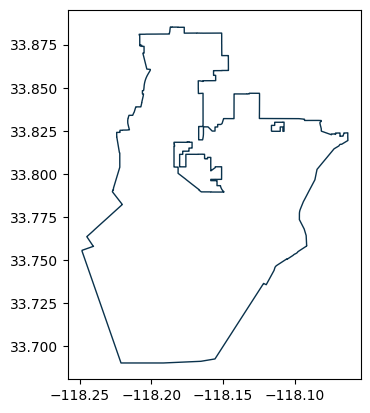

In [52]:
## Sanity Check for the Boundary
lb_msa.plot(facecolor='white',edgecolor='#0A324C')

In [53]:
## Fetch all census tracts 
ca_tracts_url = r'https://www2.census.gov/geo/tiger/TIGER2020/TRACT/tl_2020_06_tract.zip'
ca_tracts = gpd.read_file(ca_tracts_url)

In [54]:
## Sanity check CA tracts
## Plotting this takes a while


<AxesSubplot: >

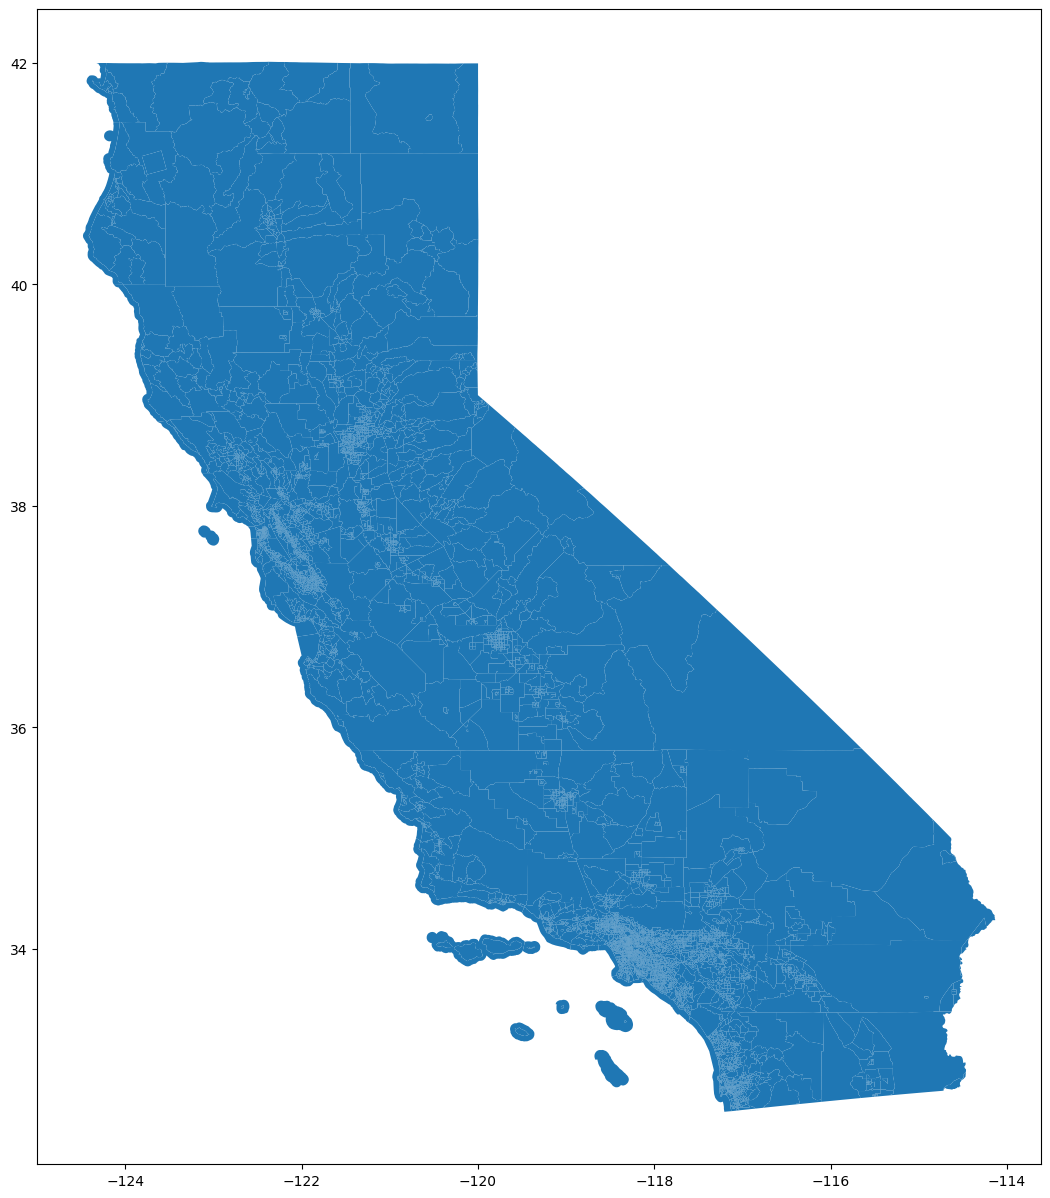

In [55]:
ca_tracts.plot(figsize=[15,15])

In [56]:
## Now we clip the tracts to Long Beach Boundary

lb_tracts = ca_tracts.clip(lb_msa)

/Users/nish/.local/share/virtualenvs/treedata-X23m-u1Y/lib/python3.10/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [58]:
lb_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
4742,06,037,554301,06037554301,5543.01,Census Tract 5543.01,G5020,S,675594,0,+33.8822626,-118.1456094,"MULTILINESTRING ((-118.15130 33.87783, -118.15..."
6158,06,037,553902,06037553902,5539.02,Census Tract 5539.02,G5020,S,1055808,0,+33.8851402,-118.1530886,"POLYGON ((-118.16114 33.77897, -118.16005 33.7..."
5276,06,037,553802,06037553802,5538.02,Census Tract 5538.02,G5020,S,1732522,33698,+33.8861963,-118.1719652,"POLYGON ((-118.11186 33.78144, -118.11184 33.7..."
7525,06,037,542200,06037542200,5422,Census Tract 5422,G5020,S,1328601,58593,+33.8868935,-118.1971508,"POLYGON ((-118.15241 33.77715, -118.15241 33.7..."
2653,06,037,571300,06037571300,5713,Census Tract 5713,G5020,S,2053604,43182,+33.8356188,-118.1500635,"POLYGON ((-118.19471 33.78259, -118.19441 33.7..."


<AxesSubplot: >

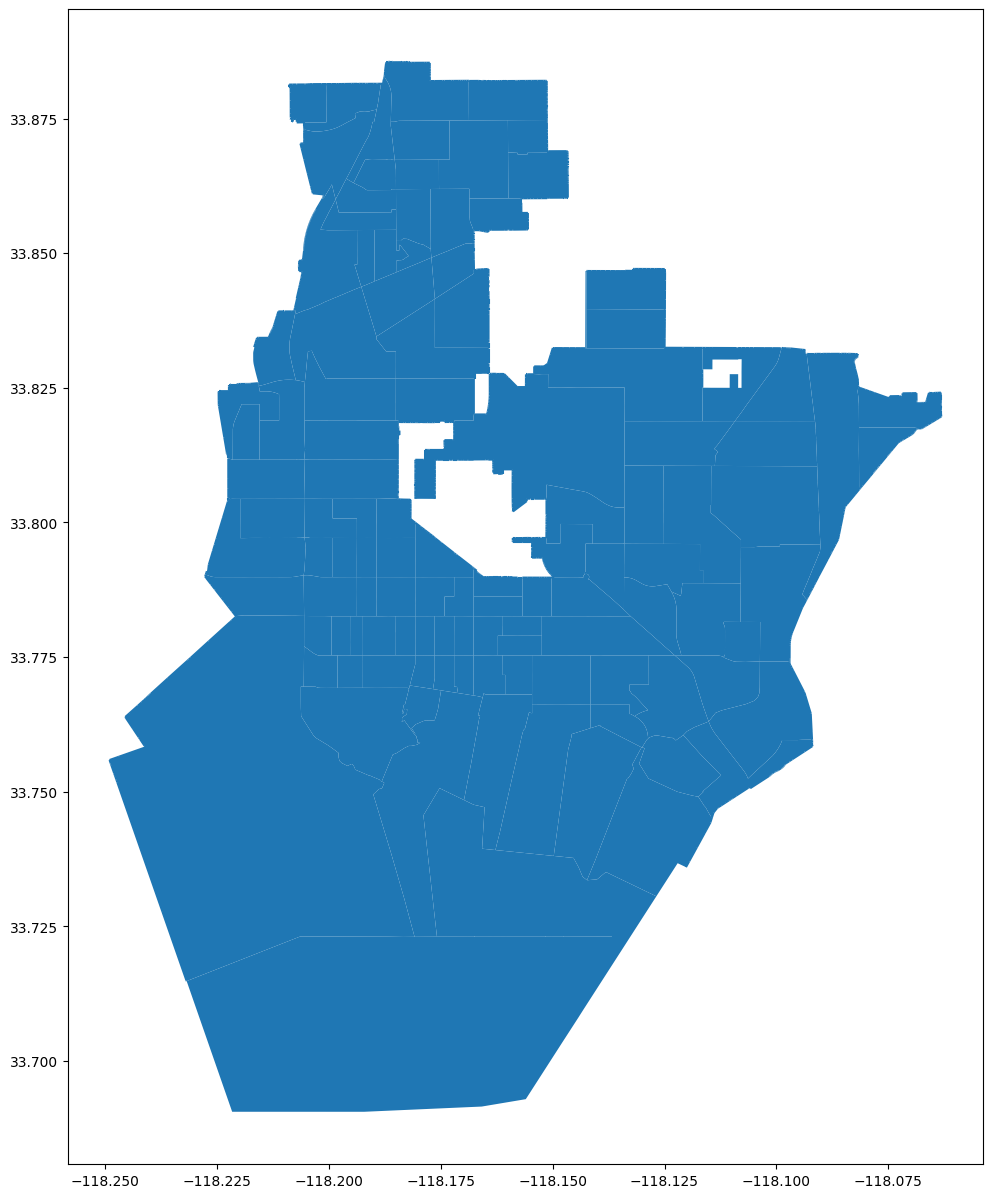

In [59]:
lb_tracts.plot(figsize=[15,15])

In [60]:
## Save it to a file
lb_tracts.to_csv('./data/lb_tracts.csv',index=False)